# Term Deposit Subscription Prediction

## Step 1: Business Understanding

#### Problem Statement :
As a member of our data analytics team, your role will involve creating tools that use our operational data to help the business achieve its goals. 

For this project, the objective is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"). Your task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.

#### Key Objectives
1. To develop a predictive model that identifies the likelihood of a client subscribing to a term deposit.
2. Provide actionable insights to support the business's marketing strategies and improve customer targeting.

#### Steps
- Conduct Exploratory Data Analysis (EDA) to identify patterns and correlations, and preprocess data.
- Perform feature engineering to select or create relevant features for prediction.
- Train a machine learning model to determine the likelihood of a client subscribing to a term deposit.
- Evaluate the model using metrics such as accuracy, precision, recall, and F1 score.
- Address class imbalance through techniques like oversampling, undersampling, or class weight adjustments.
- Summarize findings, identify key insights, and provide actionable recommendations for the marketing team.

#### Analytical Questions

1. What is the optimal contact strategy (duration, number of attempts, timing) that maximizes subscription probability while minimizing resource usage?

2. Which customer segments show the highest conversion rates, and what are their defining characteristics (age, job, education, banking history)?

3. How strongly do previous campaign outcomes predict future success, and what is the optimal re-targeting strategy for previously contacted customers?

4. Is there a significant seasonal pattern in subscription rates, and how should campaign resources be allocated across different months?

5. What combination of call duration and contact method (telephone/cellular) yields the highest success rate across different customer segments?
 
 

 
 


- __Null Hypothesis (H0):__ There is no significant relationship between the features provided in the dataset and the likelihood of a client subscribing to a term deposit.
- __Alternate Hypothesis (H1):__ There is a significant relationship between the features provided in the dataset and the likelihood of a client subscribing to a term deposit.

## Step 2: Data Understanding


The data is related to direct marketing campaigns (phone calls) of a banking institution.  
The data is related with direct marketing campaigns of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

#### Data Dictionary
There are four datasets:  

1. __bank-additional-full.csv__ with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed. 
2. __bank-additional.csv__ with 10% of the examples (4119), randomly selected from 1), and 20 inputs. 
3. __bank-full.csv__ with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).  
4. __bank.csv__ with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 

### Step 1: Load Data

#### Import libraries

Importing the necessary packages 

In [ ]:
# !pip install xgboost
# !pip install tqdm


In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd 

# Import the numpy library for data manipulation and analysis
import numpy as np

# Import the seaborn library for data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# And hypothesis testing
import statsmodels.api as sm
from scipy.stats import chi2_contingency, ttest_ind

# To track progress
from tqdm import tqdm


In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from collections import Counter
from sklearn.metrics import auc, roc_curve
from xgboost import XGBClassifier
import sklearn

# from xgboost import XGBClassifier


#### Load Data

In [3]:
bank_full = pd.read_csv(r"data\bank-full.csv",sep=";")
bank_full.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [4]:
bank_add_full = pd.read_csv(r"data\bank-additional-full.csv",sep=";")
bank_add_full.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Step 2: Read, Analyze & Clean Dataset

##### Shape of data

In [5]:
print("bank_full:", bank_full.shape)
print("bank_add_full:", bank_add_full.shape)


bank_full: (45211, 17)
bank_add_full: (41188, 21)


##### Unique values of the categorical features

In [6]:
for col in bank_full.select_dtypes(include="category").columns:
    print(f"'{col}':")
    print(bank_full[col].cat.categories)
    print("="*50)

In [7]:
for col in bank_add_full.select_dtypes(include="category").columns:
    print(f"'{col}':")
    print(bank_add_full[col].cat.categories)
    print("="*50)

##### Data Info

In [8]:
print(bank_full.info())
print("-"*50)
print(bank_add_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Range

In [9]:
# Convert all object columns to category
bank_full[bank_full.select_dtypes(include="object").columns] = bank_full.select_dtypes(include="object").astype("category")
bank_add_full[bank_add_full.select_dtypes(include="object").columns] = bank_add_full.select_dtypes(include="object").astype("category")


- _The columns are changed to their correct data types_

##### Check null values

In [10]:
print("bank_full:", bank_full.isna().sum())
print("-"*50)
print("bank_add_full:", bank_add_full.isna().sum())

bank_full: age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
--------------------------------------------------
bank_add_full: age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


- _There are no missing values in both datasets_

##### Check for duplicates

In [11]:
print("bank_full:", bank_full.duplicated().sum())
print("bank_add_full:", bank_add_full.duplicated().sum())

bank_full: 0
bank_add_full: 12


Deeper analysis on the duplicates in bank_add_full dataset

In [12]:
# Check the duplicates
baf_duplicates= bank_add_full[bank_add_full.duplicated(keep=False)]

baf_duplicates.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no


- _They are normal duplicates that can be remove_

In [13]:
# Drop the duplicates
bank_add_full = bank_add_full.drop_duplicates()

print("bank_full:", bank_full.duplicated().sum())
print("bank_add_full:", bank_add_full.duplicated().sum())

bank_full: 0
bank_add_full: 0


##### Conclusion:
- No missing values
- Data types have been corrected
- The duplicates have been handled
- All unique values have been verified

### Step 3: Exploratory Data Analysis

#### Statistic Summary

In [55]:
# Check the statical summary of the numerical features for bank full
bank_full.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


- The average duration of a call is 258 seconds
- The age range of client contacted was from 18 to 95

___

Visualizations

#### Visualizing outliers and distributions of numerical columns with box plot and KDE

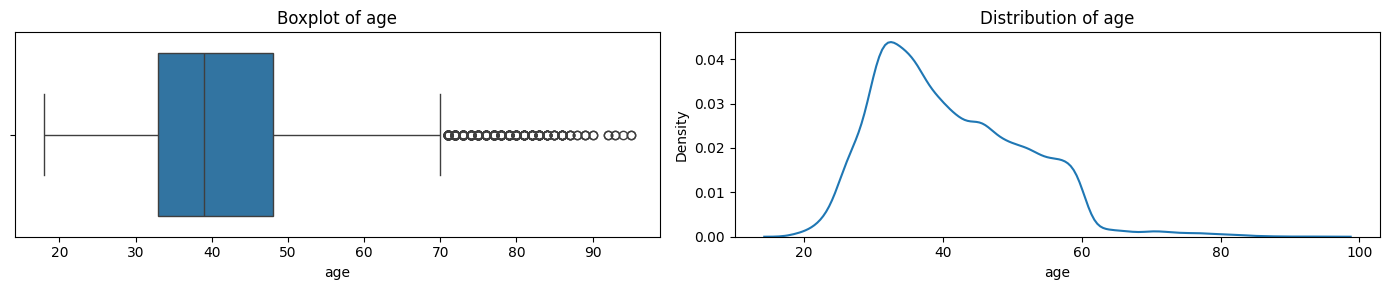

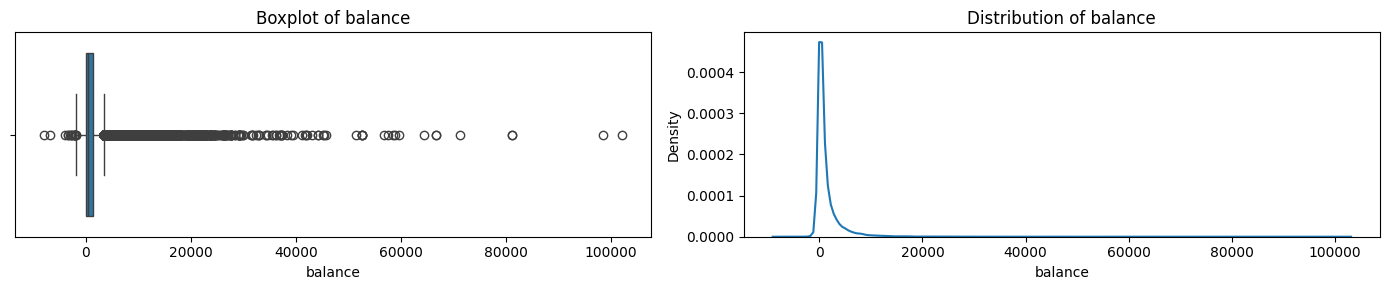

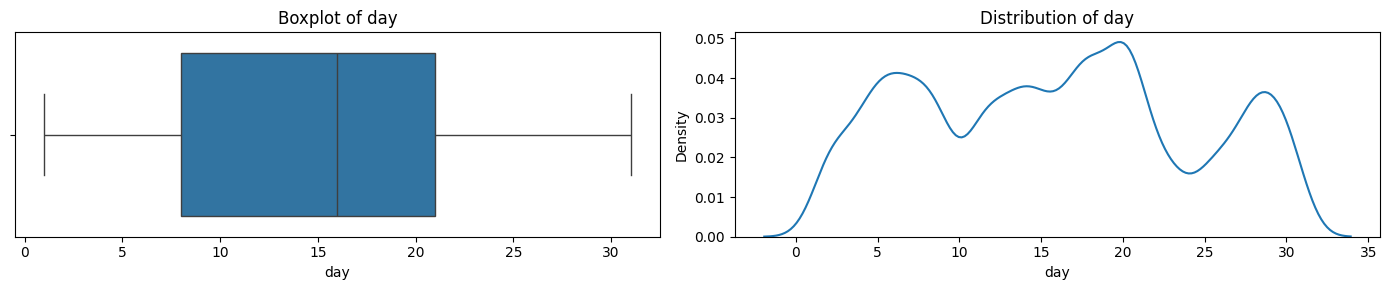

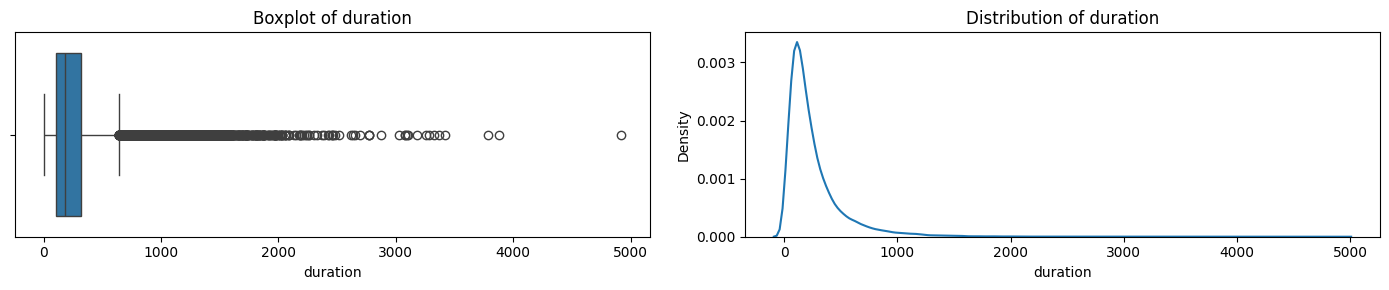

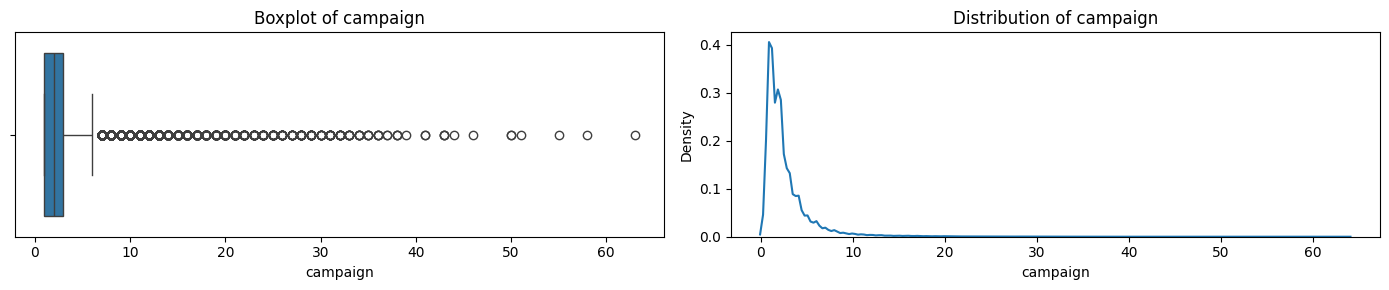

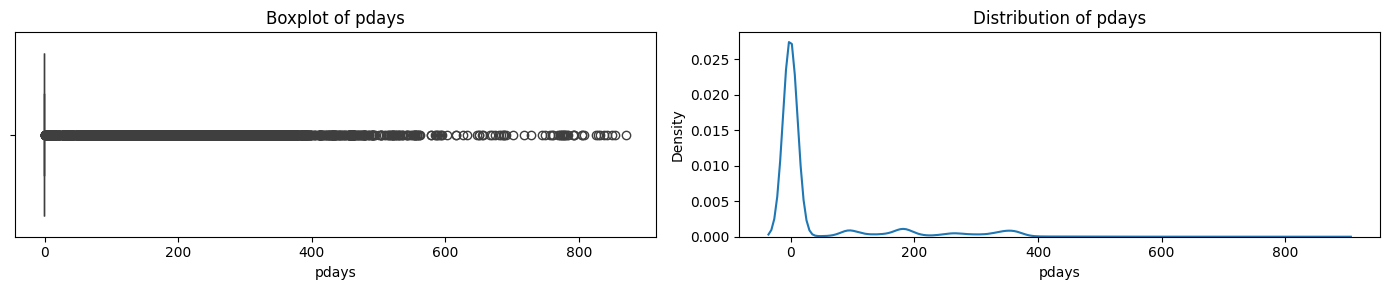

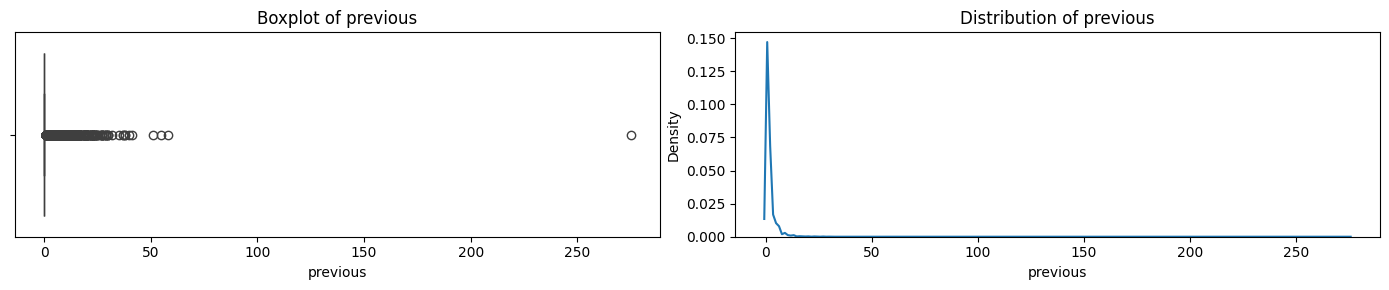

In [56]:
# Specifying numerical columns
num_col= bank_full.select_dtypes(include="int64").columns
numerical_cols_table = bank_full[num_col]

# Boxplot and KDE plot to identify outliers and distribution in numerical columns
for column in numerical_cols_table.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 3))  # Create two subplots in one row
    
    # Boxplot
    sns.boxplot(x=bank_full[column], orient="h", ax=axes[0])
    axes[0].set_title(f'Boxplot of {column}')
    
    # KDE plot
    sns.kdeplot(x=bank_full[column], ax=axes[1])
    axes[1].set_title(f'Distribution of {column}')
    
    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

 __Key Insights:__
1. Most clients are centered around 30-45 years old
2. Most accounts hold under 20,000 Eur most around 0 eur, with few high-value outliers up to 100,000
3. Peak customer activity occurs mid-month (days 15-20), but there are notable activity around days 5-10 and 25-30
4. Campaign contact efficiency drops after 3 to 5 attempts, though some cases extend to 60 contacts
5. Majority of clients are first-time campaign contacts (-1 in pdays)
6. Most customers have 0 previous contacts, suggesting an untapped customer base
7. Most calls are below 500 seconds (8 min apprx)

___

#### Univariant analysis of Categorical Columns (Histograms)

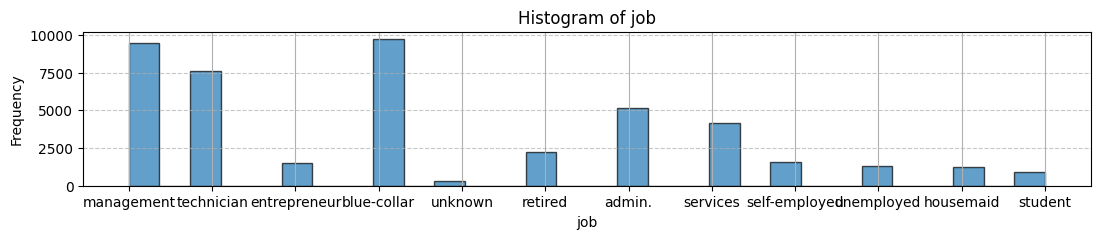

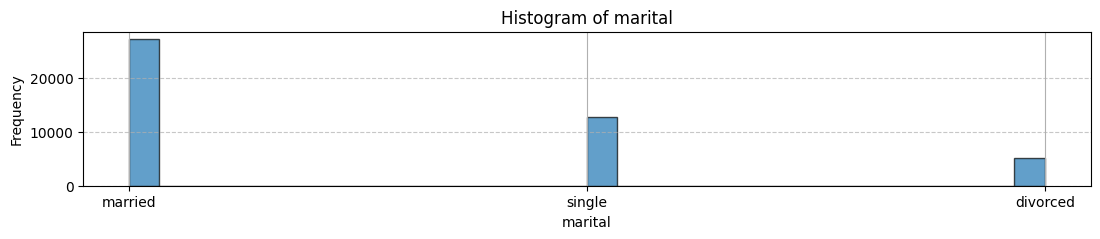

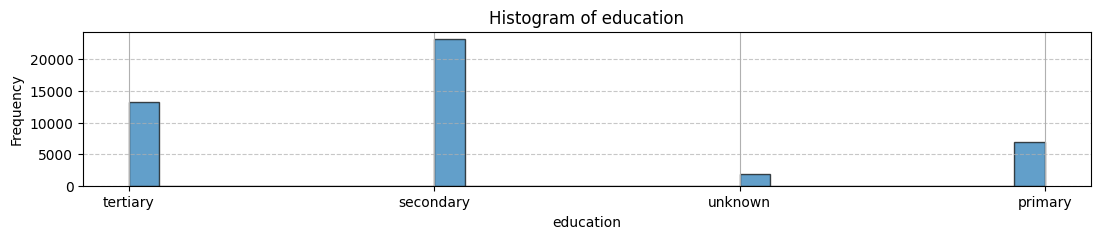

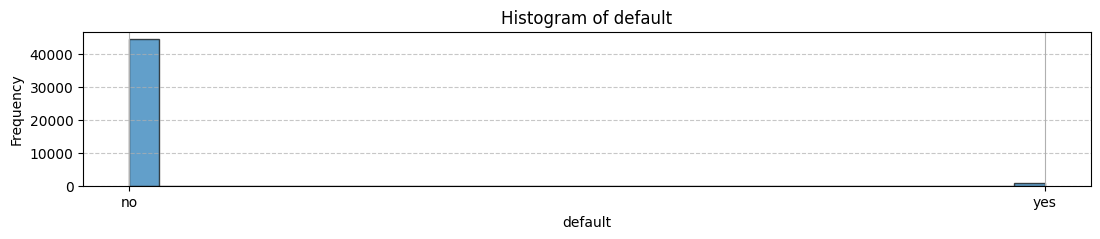

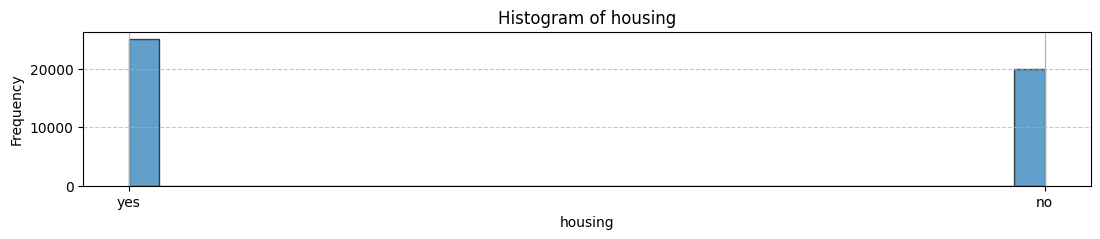

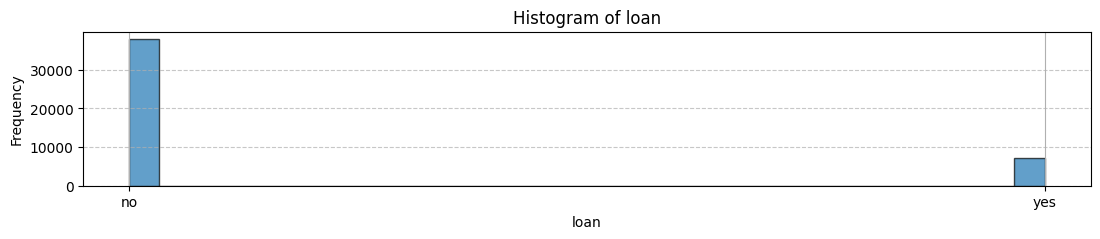

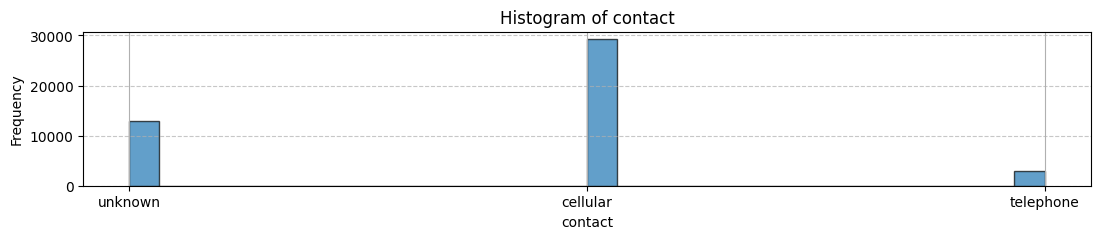

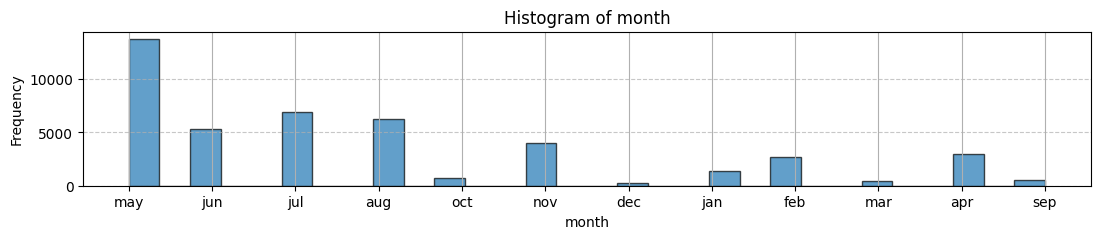

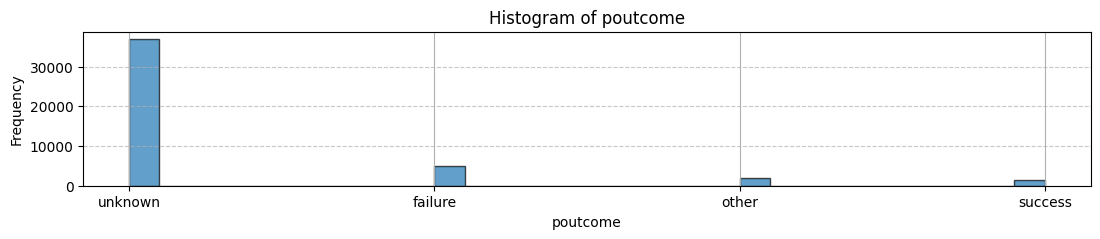

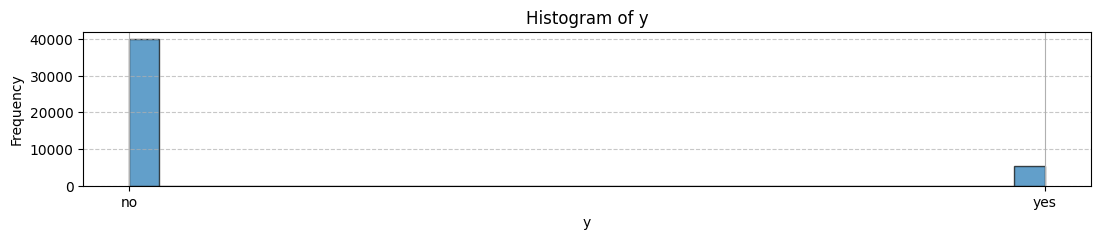

In [57]:
cat_col= bank_full.select_dtypes(include="category").columns
categorical_cols_table = bank_full[cat_col]

# Create histograms for all columns
for column in categorical_cols_table.columns:
    plt.figure(figsize=(13, 2))
    bank_full[column].hist(bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



__Observations from the Histograms:__

1. **Job**: Most clients work in management, technician, or blue-collar roles, while fewer are students, housemaids, or have unknown job categories.

2. **Marital Status**: The majority of clients are married, followed by singles and a smaller proportion of divorced individuals.

3. **Education**: Most clients have secondary or tertiary education, with fewer having primary education or unknown levels.

4. **Default**: Nearly all clients have no credit in default, indicating a low-risk customer base.

5. **Housing Loan**: A significant portion of clients have housing loans, while a smaller group does not.

6. **Personal Loan**: Most clients do not have personal loans, with only a minority having one.

7. **Contact**: Cellular is the most common communication type, followed by telephone, while "unknown" contact types are less frequent.

8. **Month**: May has the highest client contacts, with other months having relatively fewer.

9. **Poutcome (Previous Campaign Outcome)**: Most outcomes are labeled as "unknown," with fewer categorized as "failure," "other," or "success."

10. **Target Variable (`y`)**: A large majority of clients have not subscribed to term deposits, with only a small fraction having done so.

#### Multivariant analysis (Correlation Heatmap)

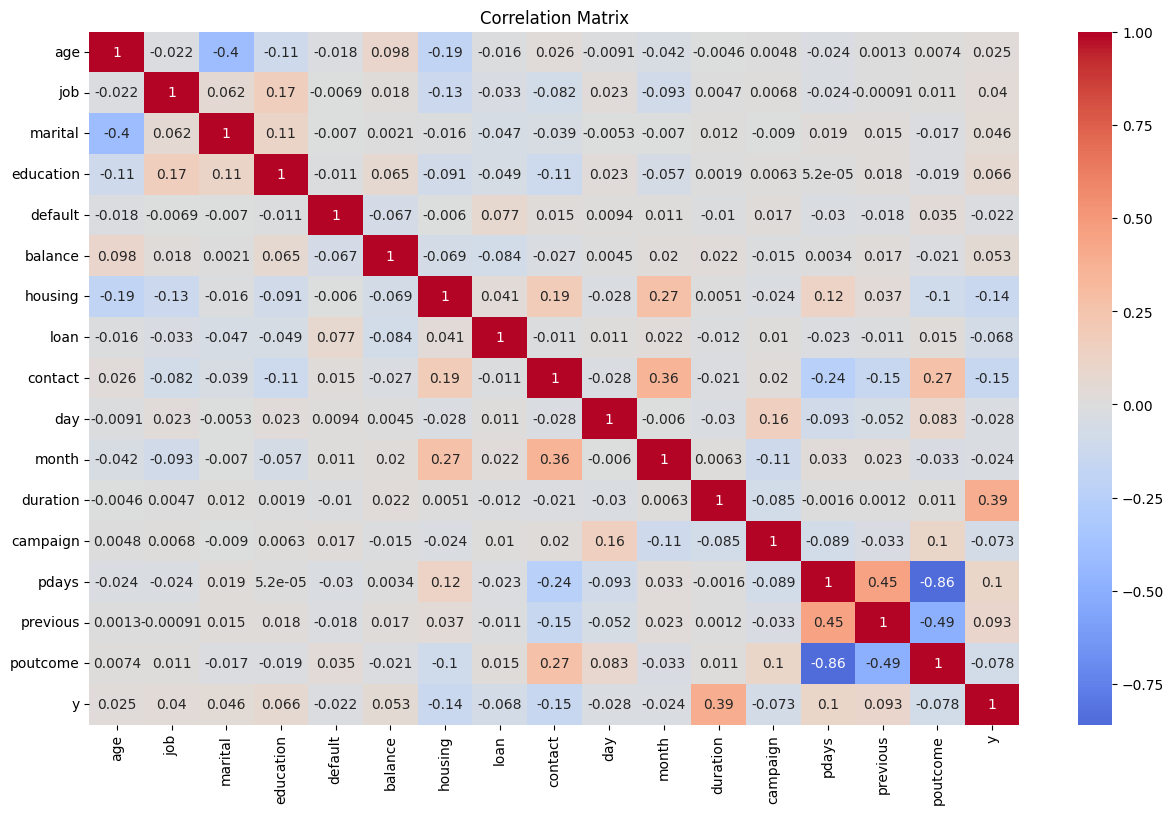

In [58]:
# Create a copy of the dataset
bank_full_copy = bank_full.copy()

# Replace categorical columns with their codes in the copy
bank_full_copy[bank_full_copy.select_dtypes(include="category").columns] = bank_full_copy.select_dtypes(include="category").apply(lambda col: col.cat.codes)


# Calculate correlation matrix
correlation_matrix = bank_full_copy.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(15, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

Strong Correlations from Heatmap

- __Duration vs Y (0.39)__: When the last contact call lasts longer, there's a higher chance of the client subscribing to the term deposit. This means engaged clients are likely spend more time discussing the offer.
- __Contact vs Month (0.36)__: The choice between telephone/cellular contact methods shows seasonal patterns throughout the year.
- __Pdays & Poutcome (-0.86)__: There's a strong negative correlation between days since last contact and previous outcome. This suggests that successful clients from previous campaigns are typically contacted again sooner, while unsuccessful or uncontacted clients (-1 in pdays) are left for longer periods.This suggests that maintaining relationships with previously successful clients and optimizing first-contact timing could improve campaign effectiveness.
- __Previous vs Poutcome (-0.49)__: More previous contact attempts correlate with less successful outcomes. This suggests that clients who need multiple contacts are less likely to convert.
- __Age vs Marital (-0.40)__: Older clients tend to be married, while younger ones are more likely single/divorced.
- __Education vs Job (0.17)__: Higher education levels (tertiary) show a weak positive correlation with certain job types, likely management and technical roles
- __Housing loan__ status correlates with seasonal patterns (0.27 with __month__), suggesting certain months might be better for approaching clients with housing loans.

Top 5 Correlations to Subscribtion (y)
1. Call duration (0.39): Longer calls are the strongest indicator of successful subscriptions, likely showing customer engagement or interest.

2. Contact timing vs month (0.27): When and how customers are contacted shows some influence on success rates.

3. Housing loans (-0.14): Customers with housing loans are slightly less likely to subscribe to term deposits.

4. Previous contact history (-0.093): Slightly lower success rates with customers who've been contacted many times before.

5. Previous campaign outcome (-0.078): Weak indication that past campaign results influence current success.

Note: Most other factors, including age, job, and education, show very weak correlations with success, suggesting these demographics aren't strong predictors of subscription likelihood.

 #### Answer Analystical Questions

##### 1. What is the optimal contact strategy (duration, number of attempts, timing) that maximizes subscription probability while minimizing resource usage?

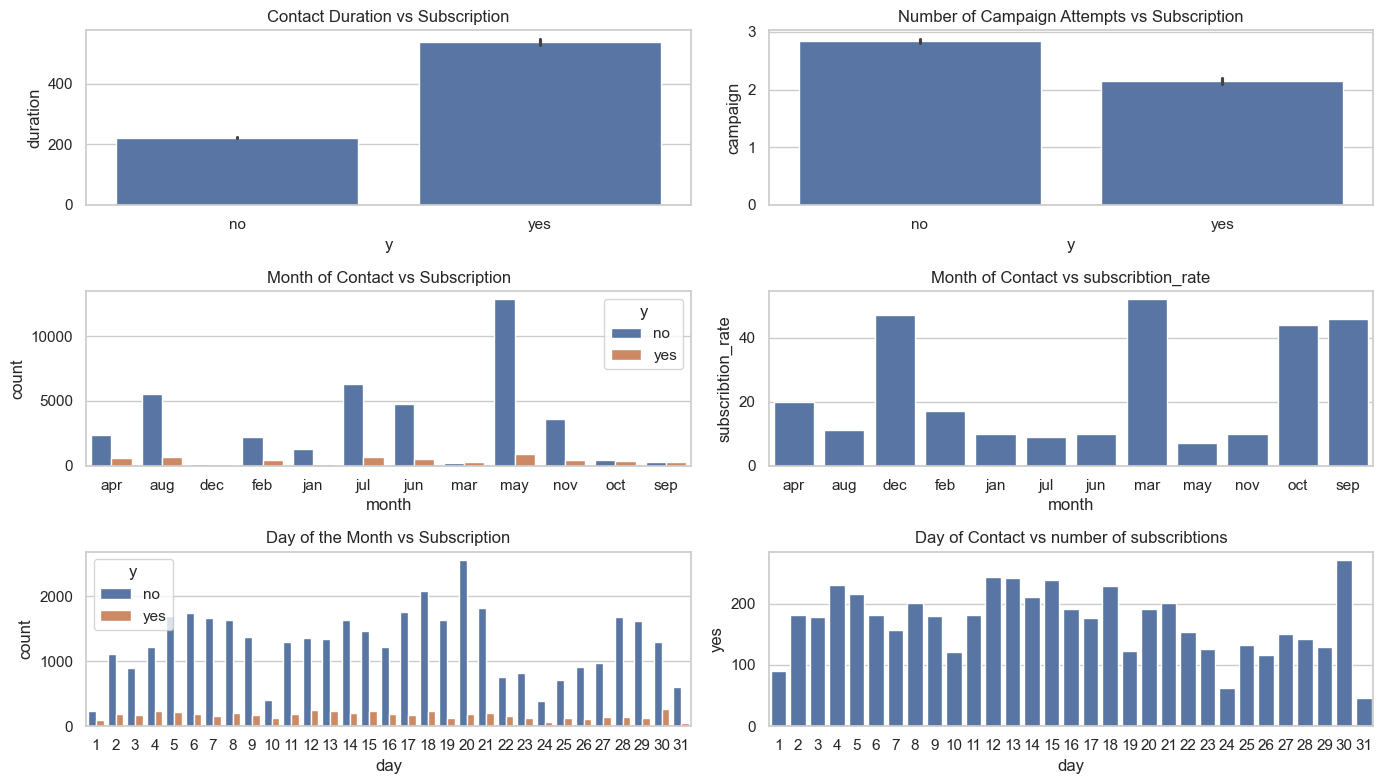

In [59]:
# Group by month and y, count occurrences, and calculate the probability of 'yes' for each month
monthly_prob = bank_full.groupby(['month', 'y'], observed=False).size().unstack(fill_value=0)
monthly_prob['subscribtion_rate'] = round((monthly_prob['yes'] / (monthly_prob['yes'] + monthly_prob['no']))*100, 0)
monthly_prob_sorted= monthly_prob.sort_values(by='yes', ascending=False)    # Sort by "yes"

# Group by day and y, count occurrences, and calculate the probability of 'yes' for each day
day_prob = bank_full.groupby(['day', 'y'], observed=False).size().unstack(fill_value=0)
day_prob['subscribtion_rate'] = round((day_prob['yes'] / (day_prob['yes'] + day_prob['no']))*100, 0)
day_prob_sorted= day_prob.sort_values(by='yes', ascending=False)    # Sort by "yes"

# Set plot style
sns.set(style="whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 8))

# 1. Relationship between contact duration and subscription
sns.barplot(x='y', y='duration', data=bank_full, ax=axes[0, 0])
axes[0, 0].set_title('Contact Duration vs Subscription')

# 2. Relationship between number of campaign attempts and subscription
sns.barplot(x='y', y='campaign', data=bank_full, ax=axes[0, 1])
axes[0, 1].set_title('Number of Campaign Attempts vs Subscription')

# 3. Relationship between the month of the contact and subscription
sns.countplot(x='month', hue='y', data=bank_full, ax=axes[1, 0])
axes[1, 0].set_title('Month of Contact vs Subscription')

# 4. Relationship between the month and subscribtion_rate
sns.barplot(x='month', y='subscribtion_rate', data=monthly_prob_sorted, ax=axes[1, 1])
axes[1, 1].set_title('Month of Contact vs subscribtion_rate')

# 5. Relationship between the day of the contact and subscription
sns.countplot(x='day', hue='y', data=bank_full, ax=axes[2, 0])
axes[2, 0].set_title('Day of the Month vs Subscription')

# 6. Relationship between the day and subscribtion_rate
sns.barplot(x='day', y='yes', data=day_prob_sorted, ax=axes[2, 1])
axes[2, 1].set_title('Day of Contact vs number of subscribtions')

# Adjust layout
plt.tight_layout()
plt.show()


Observations
- Clients with longer contact duration of above 240 are more likely to subscribe
- Clients with fewer contacts of 2 and below are more likely to subscribe
- Months with high number high volume of subscribers were April (577), May (925), June (546), July (627) and August (688). This was due to high volume of calls but the probability of obtaining subscribers on theses months were below 21%.
- Months with high subscribtion rate (over 40%) were March (52%), December (47%), September (46%) and October (44%).
- Days with high number of subscribers were days 12	13, 15 and 30.
13	1344	241	15.0
15

__Summary__
- The optimal contact strategy should aim for a longer contact duration of about 500 seconds (appx 8 min), making a 2 targeted attempts maximum, during high-conversion months (March, October, or December), specifically focusing on days 11-15 of the month or day 30 when subscription numbers show the strongest performance.

##### 2. Which customer segments show the highest conversion rates, and what are their defining characteristics (age, job, education, marital, housing and loan)?
    

In [29]:
# Group by relevant customer segments and calculate the conversion rate
segment_analysis = bank_full.groupby(['age','job', 'education', 'marital','housing','loan']).agg(
    subscribed=('y', lambda x: (x == 'yes').sum()),
    no_subscription=('y', lambda x: (x == 'no').sum())
).reset_index()

# Calculate the conversion rate
segment_analysis['conversion_rate_%'] = (segment_analysis['subscribed'] / 
    (segment_analysis['subscribed'] + segment_analysis['no_subscription'])*100
)

segment_analysis= segment_analysis.sort_values(by=['conversion_rate_%','subscribed'], ascending=False)
segment_analysis

C:\Users\Pc\AppData\Local\Temp\ipykernel_20636\1277601298.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = bank_full.groupby(['age','job', 'education', 'marital','housing','loan']).agg(


,age,job,education,marital,housing,loan,subscribed,no_subscription,conversion_rate_%
3236,23,services,secondary,single,no,no,5.0,0.0,100.0
13184,40,unemployed,tertiary,single,no,no,5.0,0.0,100.0
29040,68,retired,primary,divorced,no,no,5.0,0.0,100.0
25408,62,blue-collar,secondary,married,no,no,4.0,0.0,100.0
2696,22,student,primary,single,no,no,3.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...
44347,95,unknown,unknown,married,yes,yes,NaN,NaN,NaN
44348,95,unknown,unknown,single,no,no,NaN,NaN,NaN
44349,95,unknown,unknown,single,no,yes,NaN,NaN,NaN
44350,95,unknown,unknown,single,yes,no,NaN,NaN,NaN


- **Highest Conversion Rates**: 
  - Customers with 100% conversion rates include those in jobs like **services**, **unemployed**, **retired**, **blue-collar**, and **student**.
  
- **Defining Characteristics**:
  - **Age**: Customers aged **22 to 95** show the highest conversion rates.
  - **Job**: High-conversion jobs include **services**, **unemployed**, **retired**, **blue-collar**, and **student**.
  - **Education**: **Secondary** and **tertiary** education levels are common among high-conversion segments.
  - **Marital Status**: Both **single**, **married**, and **divorced** customers are in high-conversion segments.
  - **Housing and Loan**: Housing and loan status do not significantly affect the conversion rates.

- **Key Insight**: Younger and retired customers, particularly with **secondary** or **tertiary** education, and in certain job types like **student** and **retired**, show the highest conversion rates.

##### 3. How strongly do previous campaign outcomes predict future success, and what is the optimal re-targeting strategy for previously contacted customers?

In [31]:
# Grouping data by previous campaign outcome and calculating conversion rates
previous_campaign_analysis = bank_full.groupby("poutcome").agg(
    subscribed=('y', lambda x: (x == 'yes').sum()),
    no_subscription=('y', lambda x: (x == 'no').sum())
).reset_index()

# Calculate the conversion rate
previous_campaign_analysis['conversion_rate_%'] = (previous_campaign_analysis['subscribed'] / 
    (previous_campaign_analysis['subscribed'] + previous_campaign_analysis['no_subscription'])*100
)

previous_campaign_analysis= previous_campaign_analysis.sort_values(by=['conversion_rate_%','subscribed'], ascending=False)

previous_campaign_analysis

C:\Users\Pc\AppData\Local\Temp\ipykernel_20636\4143040912.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  previous_campaign_analysis = bank_full.groupby("poutcome").agg(


,poutcome,subscribed,no_subscription,conversion_rate_%
2,success,978,533,64.725347
1,other,307,1533,16.684783
0,failure,618,4283,12.609671
3,unknown,3386,33573,9.161503


1. **Success**: Highest conversion rate at **64.73%**—prior successful campaigns strongly influence subscriptions.  
2. **Other**: Conversion rate is **16.68%**—moderate effectiveness in converting this group.  
3. **Failure**: Low conversion rate at **12.61%**—clients from failed campaigns are less likely to subscribe.  
4. **Unknown**: Lowest conversion rate at **9.16%**—limited engagement leads to poor subscription rates.  

**Conclusion**: Successful prior campaigns drive the highest subscription rates.


##### 4. Is there a significant seasonal pattern in subscription rates, and how should campaign resources be allocated across different months?

C:\Users\Pc\AppData\Local\Temp\ipykernel_20636\1685799668.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_data = bank_full.groupby('month').agg(


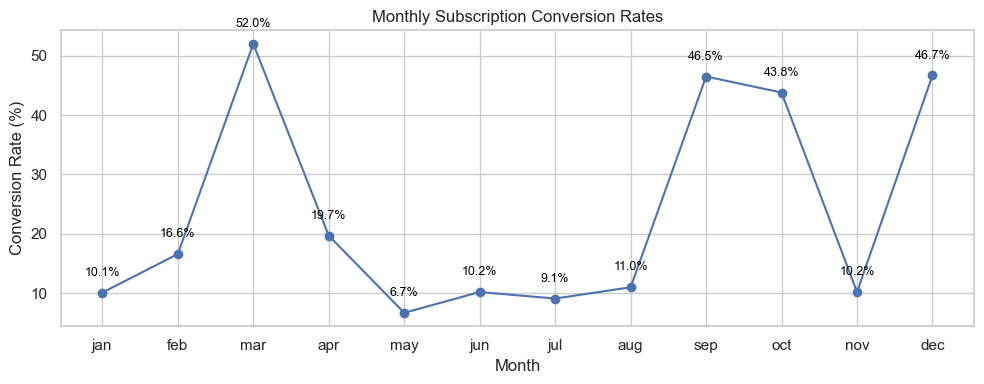

In [ ]:
# Group data by month and calculate subscription statistics
monthly_data = bank_full.groupby('month').agg(
    subscribed=('y', lambda x: (x == 'yes').sum()),
    no_subscription=('y', lambda x: (x == 'no').sum())
).reset_index()

# Calculate subscription rates for each month
monthly_data['conversion_rate'] = round((monthly_data['subscribed'] / 
                                   (monthly_data['subscribed'] + monthly_data['no_subscription'])) * 100, 1)

# Sort months in calendar order
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=month_order, ordered=True)
monthly_data = monthly_data.sort_values('month')

# Plot the subscription rates
plt.figure(figsize=(10, 4))
plt.plot(monthly_data['month'], monthly_data['conversion_rate'], marker='o', linestyle='-', color='b')
for i, row in monthly_data.iterrows():
    plt.text(row['month'], row['conversion_rate'], f"{row['conversion_rate']:.1f}%\n", 
             ha='center', va='bottom', fontsize=9, color='black')
plt.title('Monthly Subscription Conversion Rates')
plt.xlabel('Month')
plt.ylabel('Conversion Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

__Observations__:

- Peak Months : March, September, December and October exhibited the highest subscription conversion rates, with 52.0%, 46.5%, 46.7% and 43.8% respectively.
- Low Months : May had the lowest conversion rate of 6.7%, despite a large number of non-subscribers.

**Conclusion**
- The months with the most promising subscription rates are March, September, October and December, suggesting a strong seasonal effect during the end and mid-year.

##### 5. What combination of call duration and contact method (telephone/cellular) yields the highest success rate across different customer segments?

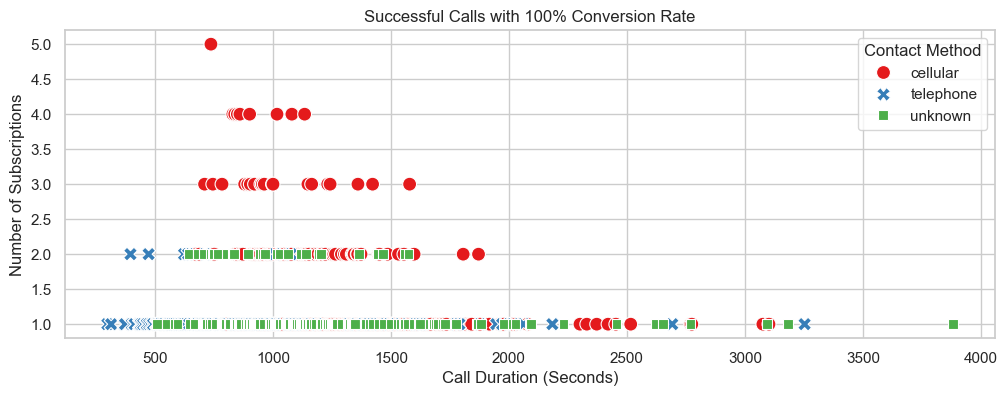

In [81]:
# Grouping data by previous campaign outcome and calculating conversion rates
success_rate_by_contact_duration = bank_full.groupby(['contact', 'duration'], observed=False).agg(
    subscribed=('y', lambda x: (x == 'yes').sum()),
    no_subscription=('y', lambda x: (x == 'no').sum())
).reset_index()

# Calculate the conversion rate
success_rate_by_contact_duration['conversion_rate_%'] = (success_rate_by_contact_duration['subscribed'] / 
    (success_rate_by_contact_duration['subscribed'] + success_rate_by_contact_duration['no_subscription'])*100)
success_rate_by_contact_duration['conversion_rate_%'] = round(success_rate_by_contact_duration['conversion_rate_%'], 2)

# Sort the conversion rates in descending order
success_rate_by_contact_duration= success_rate_by_contact_duration.sort_values(by=['conversion_rate_%','subscribed'], ascending=False)

# Filter the data where conversion rate is 100%
successful_calls = success_rate_by_contact_duration[success_rate_by_contact_duration['conversion_rate_%'] == 100]

# Plot the number of successful subscriptions by contact method and call duration
plt.figure(figsize=(12, 4))
sns.scatterplot(data=successful_calls, x='duration', y='subscribed', hue='contact', style='contact', s=100, palette='Set1')

plt.title('Successful Calls with 100% Conversion Rate')
plt.xlabel('Call Duration (Seconds)')
plt.ylabel('Number of Subscriptions')
plt.legend(title='Contact Method')
plt.grid(True)
plt.show()


__Observations__
- Cellular Contact : Most successful calls with 100% conversion rate. Successful conversions occur across a range of durations (500-3500 seconds), but more concentrated in a durations (500-1500 seconds).
  
- Telephone Contact : Fewer successful conversions. Mostly concentrated in call durations of 500-1500 seconds.

- Unknown Contact : Very few successful conversions. Spread across a wide range of call durations (500-3500 seconds), but generally lower success.

**Summary**:
  - The ***cellular calls*** are the most effective in terms of conversion, especially in durations of ***500-1500 seconds***. Telephone and unknown methods have fewer successful outcomes, with fewer conversions even at higher call durations.

### Hypothesis testing

In [ ]:
# For binary target 'y' where 'yes' = 1 and 'no' = 0
bank_full['y'] = bank_full['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Perform Chi-Square Test for Categorical Variables
categorical_columns = bank_full.select_dtypes(include=['object','category']).columns
categorical_columns = categorical_columns[categorical_columns != 'y']  # Exclude target 'y'

p_values_cat = {}
for column in categorical_columns:
    contingency_table = pd.crosstab(bank_full[column], bank_full['y'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    p_values_cat[column] = p_value

significant_categorical_factors = [col for col, p in p_values_cat.items() if p < 0.05]
print('Significant categorical factors:', significant_categorical_factors)

# Perform T-Test for Numerical Variables
numerical_columns = bank_full.select_dtypes(include=['number']).columns
numerical_columns = numerical_columns[numerical_columns != 'y']  # Exclude target 'y'

p_values_num = {}
for column in numerical_columns:
    group_1 = bank_full[bank_full['y'] == 1][column]
    group_2 = bank_full[bank_full['y'] == 0][column]
    _, p_value = ttest_ind(group_1, group_2, nan_policy='omit')
    p_values_num[column] = p_value

significant_numerical_factors = [col for col, p in p_values_num.items() if p < 0.05]
print('Significant numerical factors:', significant_numerical_factors)


Significant categorical factors: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Significant numerical factors: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


__Summary__ :
- We successfully reject the null hypothesis. There is a significant relationship between various features in the dataset and the likelihood of a client subscribing to the product.

## Step 4: Data Preparation

### Split dataset and create Pipelines


In [10]:
# Choose features for training
X = bank_full.drop(columns=["y"], axis=1)
y = bank_full["y"]

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size= 0.2, stratify=y ,random_state=2)
(X_train.shape, y_train.shape) , (X_eval.shape, y_eval.shape)

(((36168, 16), (36168,)), ((9043, 16), (9043,)))

In [11]:
# Split X to numerical and categorical columns
numerical_columns = X.select_dtypes("number").columns
categorical_columns=X.select_dtypes(["category","bool","object"]).columns

print(f"Numeric features: {len(numerical_columns)}")
print(f"Categorical features: {len(categorical_columns)}")

Numeric features: 7
Categorical features: 9


___

Encoding y_train and y_test


In [12]:
# Encode the y_train and y_eval with OneHotEncoder
encoder1 = LabelEncoder()

y_train_encoded = encoder1.fit_transform(y_train)
y_eval_encoded = encoder1.transform(y_eval)


___

Check to see if yeo johnson transformation (Gaussian Distrbution) works well


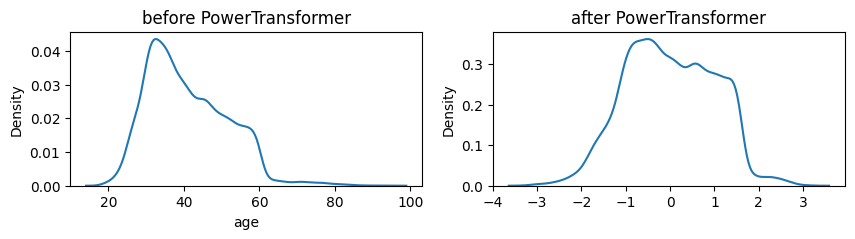

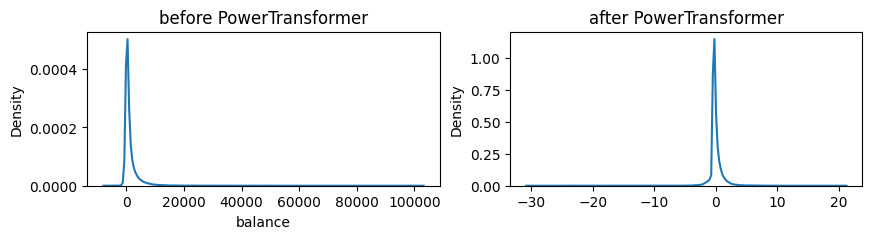

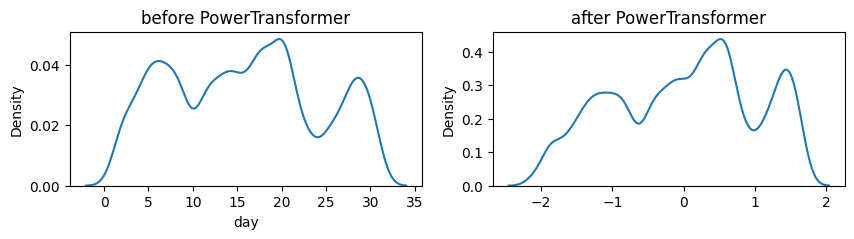

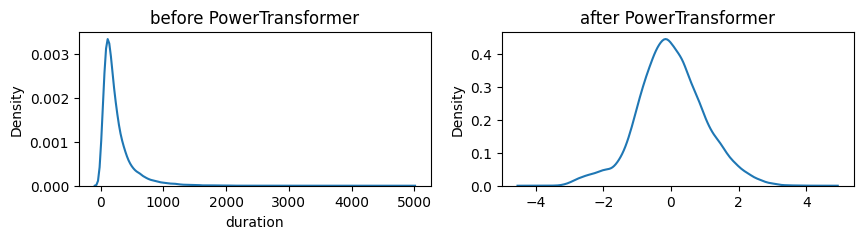

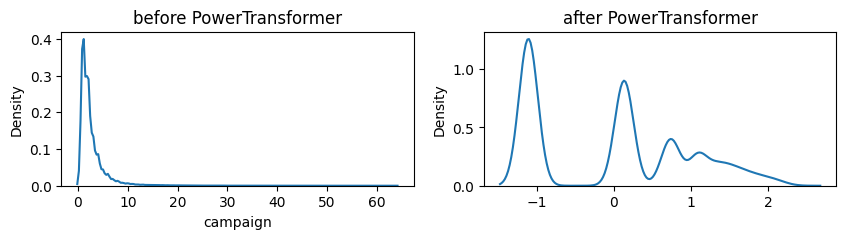

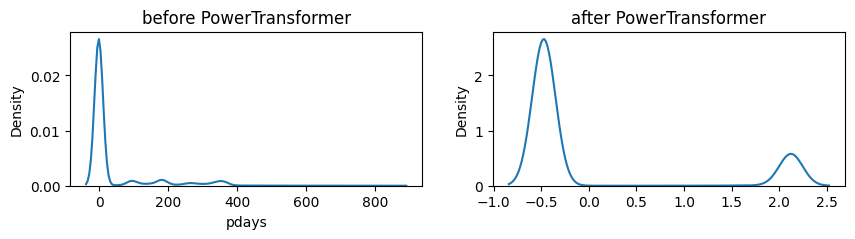

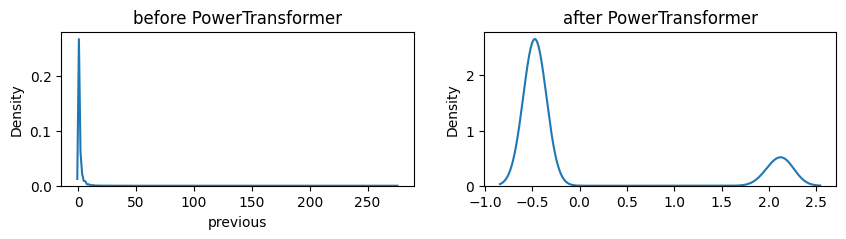

In [13]:
def plots(df, var, t):
    plt.figure(figsize=(10, 2))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' +str(t).split('(')[0])

    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' +str(t).split('(')[0])

for col in X.select_dtypes('number').columns:
    plots(X_train, col, PowerTransformer(method='yeo-johnson'))

__Summary__
- The Yeo-Johnson transformation appears to be generally effective in normalizing the data distributions. While it significantly improves the Gaussian characteristics of most variables, it doesn't achieve perfect normalization in all cases.
- The "day" and "balance" columns, These two stand out as the most problematic, as "day" is particularly resistant to normalization as it maintains its irregular pattern even after transformation, making it the clearest case where the Yeo-Johnson transformation was not fully effective.

In [14]:
# roc_curve_data['Logistic Regression'].head()

___

Create Pipeline

In [15]:
# Define the numeric pipeline
numeric_pipeline = Pipeline(steps=[
    ('num_impute', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('power_transformer', PowerTransformer(method='yeo-johnson'))
])

# Define the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('cat_impute', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num_pipeline', numeric_pipeline, numerical_columns),
    ('cat_pipeline', categorical_pipeline, categorical_columns)
])

In [16]:
# Show the training data class before and after balancing
print('Before balance')
count_before = pd.value_counts(y)
percentage_before = (count_before / count_before.sum()) * 100
for label, count in count_before.items():
    print(f'{label}: {count} ({percentage_before[label]:.2f}%)')


Before balance
no: 39922 (88.30%)
yes: 5289 (11.70%)


C:\Users\Pc\AppData\Local\Temp\ipykernel_21324\3918498666.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_before = pd.value_counts(y)


### Modeling and Evaluation
__Summary__
- The models with balanced data under the random undersampler produced a much better performance for the True positive rate tho they had a low F1-score.

- The SVC and Random forest models ofthe balanced data (under sampling) had a much desireable result.
- The ROC curve is the same for the balanced and unbalanced data

#### Unbalanced Data

In [47]:
models= [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True, kernel='linear')),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state =42)),
    ('KNN', KNeighborsClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42))
]

In [9]:
unbalanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
unbalanced_pipeline ={}

for model_name, classifier in models:

    pipeline= Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)
    ])
    pipeline.fit(X_train, y_train_encoded)
    
    unbalanced_pipeline[model_name] = pipeline

    y_pred = pipeline.predict(X_eval)

    unbalanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    accuracy = unbalanced_metrics['accuracy']
    precision = unbalanced_metrics['weighted avg']['precision']
    recall = unbalanced_metrics['weighted avg']['recall']
    f1 = unbalanced_metrics['weighted avg']['f1-score']

    unbalanced_table.loc[len(unbalanced_table)] = [model_name, accuracy, precision, recall, f1]

unbalanced_table= unbalanced_table.sort_values(by="F1_Score", ascending=False)

unbalanced_table

NameError: name 'preprocessor' is not defined

In [ ]:
unbalanced_table

,Models,Accuracy,Precision,Recall,F1_Score
6,XGBoost,0.904014,0.895674,0.904014,0.898637
5,Gradient Boosting,0.905783,0.893697,0.905783,0.895578
2,Random Forest,0.902577,0.889224,0.902577,0.891464
3,Logistic Regression,0.900697,0.885616,0.900697,0.887064
1,SVC,0.901692,0.886479,0.901692,0.884397
4,KNN,0.890081,0.868947,0.890081,0.872519
0,Decision Tree,0.870950,0.870156,0.870950,0.870550


Models with high FI_Score:
- XGBoost (0.89)
- Gradient Boosting (0.89)
- Random Forest (0.89)


___

Confusion Matrix of the Models

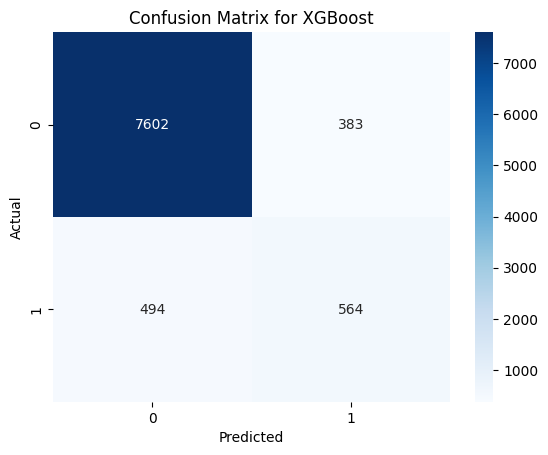

True Negative Rate(0) (Specificity) for XGBoost: 95.00%
True Positive Rate(1) (Sensitivity) for XGBoost: 53.00%


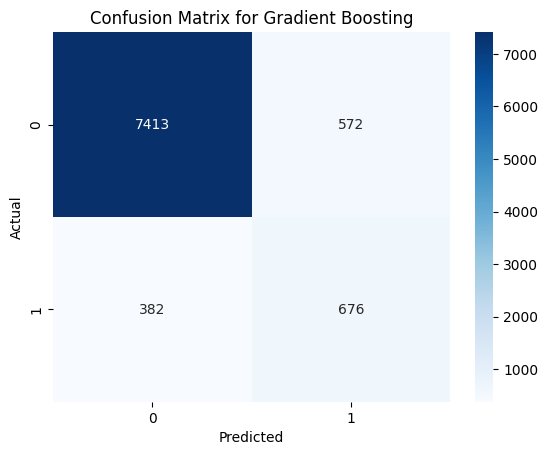

True Negative Rate(0) (Specificity) for Gradient Boosting: 92.00%
True Positive Rate(1) (Sensitivity) for Gradient Boosting: 63.00%


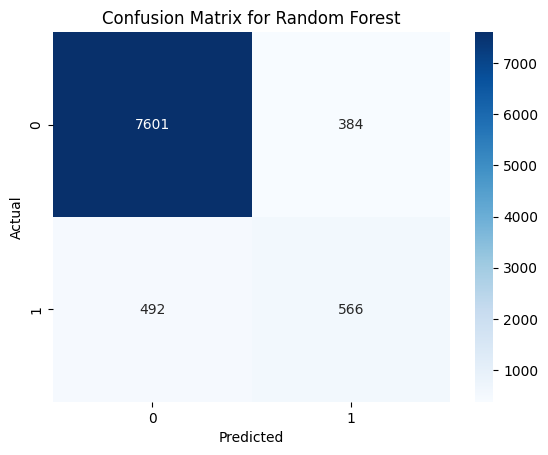

True Negative Rate(0) (Specificity) for Random Forest: 95.00%
True Positive Rate(1) (Sensitivity) for Random Forest: 53.00%


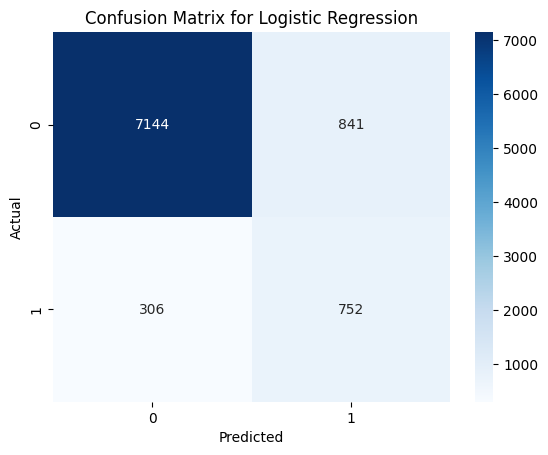

True Negative Rate(0) (Specificity) for Logistic Regression: 89.00%
True Positive Rate(1) (Sensitivity) for Logistic Regression: 71.00%


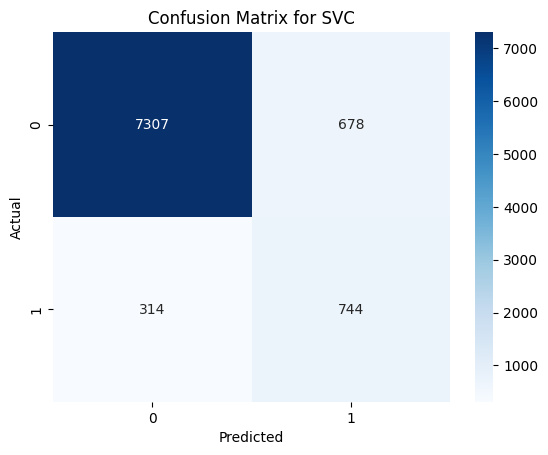

True Negative Rate(0) (Specificity) for SVC: 91.00%
True Positive Rate(1) (Sensitivity) for SVC: 70.00%


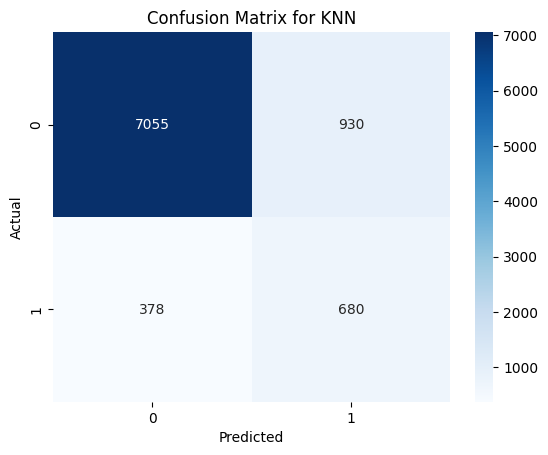

True Negative Rate(0) (Specificity) for KNN: 88.00%
True Positive Rate(1) (Sensitivity) for KNN: 64.00%


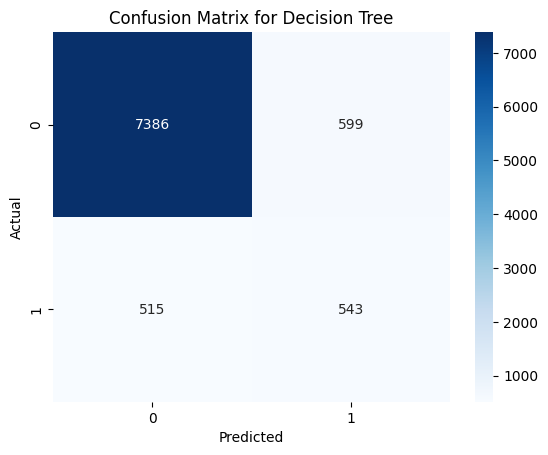

True Negative Rate(0) (Specificity) for Decision Tree: 92.00%
True Positive Rate(1) (Sensitivity) for Decision Tree: 51.00%


In [ ]:
# Get the model names based on F1 Score
top_3 = unbalanced_table['Models'].tolist()

for mod in top_3:
    model_pipeline = unbalanced_pipeline[mod]  # Get the pipeline for the current model

    # Predictions using the model
    y_pred = model_pipeline.predict(X_eval)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_eval_encoded, y_pred)

    # Plotting the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {mod}')
    plt.show()

    # Calculate metrics from the confusion matrix
    TN, FP, FN, TP = cm.ravel()
    true_negative_rate = int((TN / (TN + FP))*100)  # Specificity
    true_positive_rate = int((TP / (TP + FN))*100)  # Sensitivity/Recall

    # Print metrics
    print(f"True Negative Rate(0) (Specificity) for {mod}: {true_negative_rate:.2f}%")
    print(f"True Positive Rate(1) (Sensitivity) for {mod}: {true_positive_rate:.2f}%")

    # Calculate the classification report
    report = classification_report(y_eval_encoded, y_pred)
    # print(f"Classification Report for {mod}:\n{report}")


__Observation__
- Given our objective of improving prediction accuracy for subscribers, the SVC and Logistic Regression models demonstrate superior performance. Both models achieve high True Positive Rates of 71% and 70%, respectively, making them effective predictors for identifying those who subscribed.

#### Balanced Data (SMOTE Over Sampling)

In [ ]:
# Initialize an empty DataFrame to store model metrics
balanced_table = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline = {}

# Loop through each model and its corresponding classifier
for model_name, classifier in tqdm(models, desc="Evaluating models"):       # tdqm for tracking processing

    # Create a pipeline with preprocessing, over-sampling, and classifier steps
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('over-sampler', SMOTE(random_state=42, sampling_strategy=0.5)),
        ('classifier', classifier)
    ])
                     # # Apply SMOTE separately to check the distribution
                    # X_resampled, y_resampled = SMOTE(random_state=42, sampling_strategy=1.0).fit_resample(X_train, y_train_encoded)
                    
                    # # Print the resampled class distribution
                    # print(f'Resampled class distribution for {model_name}: {Counter(y_resampled)}')   
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Store the pipeline in the dictionary
    balanced_pipeline[model_name] = pipeline

    # Make predictions on the evaluation data
    y_pred = pipeline.predict(X_eval)

    # Get the classification report as a dictionary
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    # Extract metrics from the classification report
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    # Add metrics to the DataFrame
    balanced_table.loc[len(balanced_table)] = [model_name, accuracy, precision, recall, f1]

# Sort the DataFrame by F1_Score in descending order and reset the index
balanced_table = balanced_table.sort_values(by="F1_Score", ascending=False).reset_index(drop=True)

# Display the final table
balanced_table


Evaluating models: 100%|██████████| 7/7 [09:20<00:00, 80.08s/it] 


,Models,Accuracy,Precision,Recall,F1_Score
0,Random Forest,0.903129,0.899028,0.903129,0.900850
1,XGBoost,0.903019,0.898804,0.903019,0.900669
2,Gradient Boosting,0.894504,0.903104,0.894504,0.898215
3,SVC,0.890302,0.907835,0.890302,0.897073
4,Logistic Regression,0.873162,0.901965,0.873162,0.883762
5,Decision Tree,0.876811,0.881078,0.876811,0.878837
6,KNN,0.855358,0.887514,0.855358,0.867731


Confusion Matrix from the SMOTE balanced table

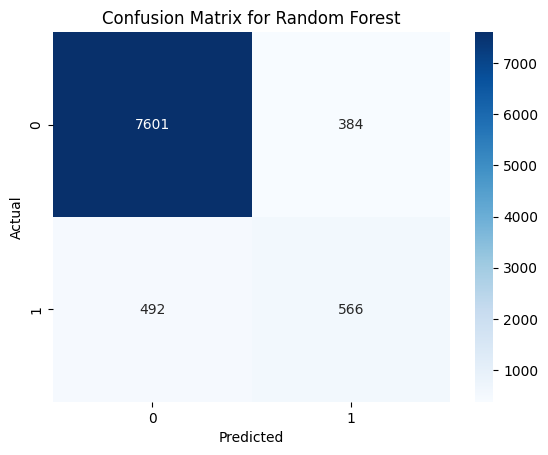

True Negative Rate(0) (Specificity) for Random Forest: 95.00%
True Positive Rate(1) (Sensitivity) for Random Forest: 53.00%


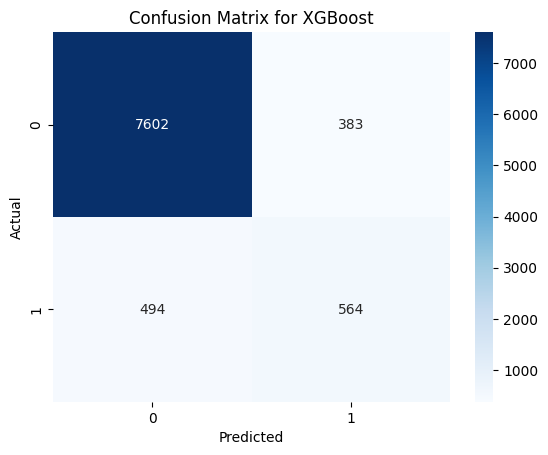

True Negative Rate(0) (Specificity) for XGBoost: 95.00%
True Positive Rate(1) (Sensitivity) for XGBoost: 53.00%


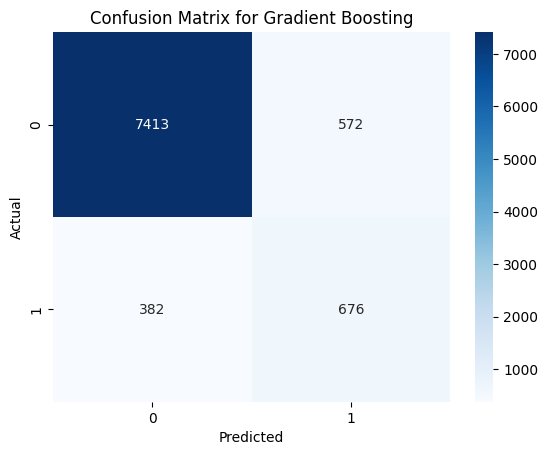

True Negative Rate(0) (Specificity) for Gradient Boosting: 92.00%
True Positive Rate(1) (Sensitivity) for Gradient Boosting: 63.00%


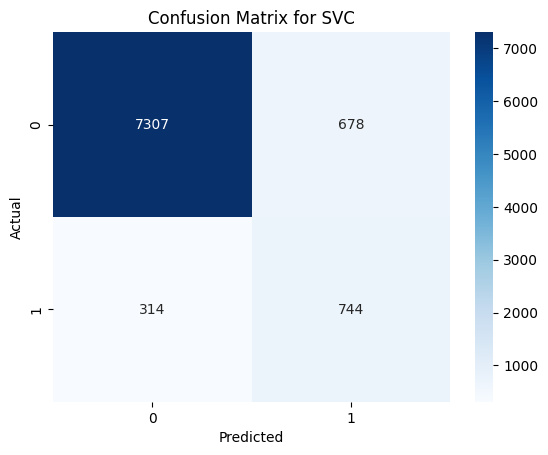

True Negative Rate(0) (Specificity) for SVC: 91.00%
True Positive Rate(1) (Sensitivity) for SVC: 70.00%


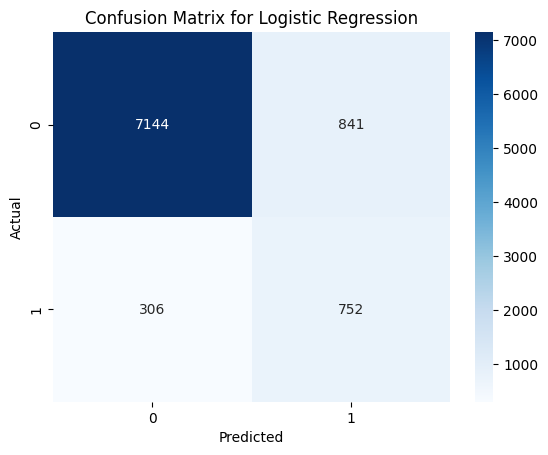

True Negative Rate(0) (Specificity) for Logistic Regression: 89.00%
True Positive Rate(1) (Sensitivity) for Logistic Regression: 71.00%


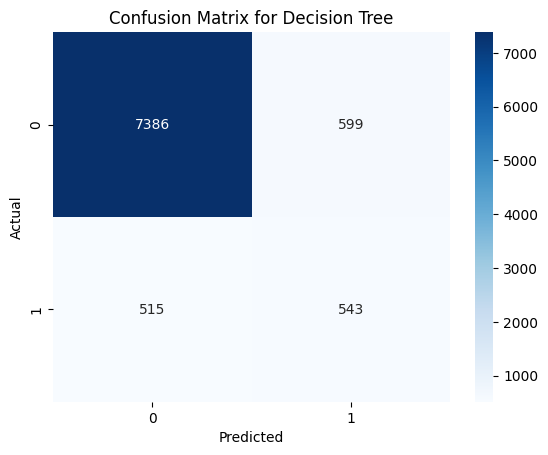

True Negative Rate(0) (Specificity) for Decision Tree: 92.00%
True Positive Rate(1) (Sensitivity) for Decision Tree: 51.00%


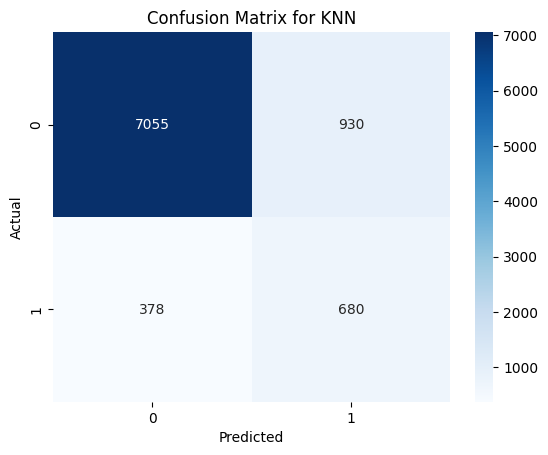

True Negative Rate(0) (Specificity) for KNN: 88.00%
True Positive Rate(1) (Sensitivity) for KNN: 64.00%


In [111]:
# Get the top 3 model names based on F1 Score
top_3_balanced = balanced_table['Models'].tolist()

for mod in top_3_balanced:
    model_pipeline = balanced_pipeline[mod]  # Get the pipeline for the current model

    # Predictions using the model
    y_pred = model_pipeline.predict(X_eval)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_eval_encoded, y_pred)

    # Plotting the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {mod}')
    plt.show()

    # Calculate metrics from the confusion matrix
    TN, FP, FN, TP = cm.ravel()
    true_negative_rate = int((TN / (TN + FP))*100)  # Specificity
    true_positive_rate = int((TP / (TP + FN))*100)  # Sensitivity/Recall

    # Print metrics
    print(f"True Negative Rate(0) (Specificity) for {mod}: {true_negative_rate:.2f}%")
    print(f"True Positive Rate(1) (Sensitivity) for {mod}: {true_positive_rate:.2f}%")

    # Calculate the classification report
    report = classification_report(y_eval_encoded, y_pred)
    # print(f"Classification Report for {mod}:\n{report}")


__Observation__
- The SVC and Logistic Regression models demonstrate superior performance, Results are the same as the unbalanced result.


#### Balanced Data (Under-Sampling)

In [28]:
X_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train_encoded)
print(f'Resampled class distribution for {model_name}: {Counter(y_resampled)}')


Resampled class distribution for XGBoost: Counter({np.int64(0): 4231, np.int64(1): 4231})


In [29]:
# Initialize an empty DataFrame to store model metrics
balanced_table1 = pd.DataFrame(columns=['Models', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
balanced_pipeline1 = {}

# Loop through each model and its corresponding classifier
for model_name, classifier in tqdm(models, desc="Evaluating models"):

    # Create a pipeline with preprocessing, under-sampling, and classifier steps
    pipeline = imbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('under-sampler', RandomUnderSampler(random_state=42)),
        ('classifier', classifier)
    ])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)
    
    # Store the pipeline in the dictionary
    balanced_pipeline1[model_name] = pipeline

    # Make predictions on the evaluation data
    y_pred = pipeline.predict(X_eval)

    # Get the classification report as a dictionary
    balanced_metrics = classification_report(y_eval_encoded, y_pred, output_dict=True)

    # Extract metrics from the classification report
    accuracy = balanced_metrics['accuracy']
    precision = balanced_metrics['weighted avg']['precision']
    recall = balanced_metrics['weighted avg']['recall']
    f1 = balanced_metrics['weighted avg']['f1-score']

    # Add metrics to the DataFrame
    balanced_table1.loc[len(balanced_table1)] = [model_name, accuracy, precision, recall, f1]

# Sort the DataFrame by F1_Score in descending order and reset the index
balanced_table1 = balanced_table1.sort_values(by="F1_Score", ascending=False).reset_index(drop=True)

# Display the final table
balanced_table1

Evaluating models: 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]


,Models,Accuracy,Precision,Recall,F1_Score
0,XGBoost,0.856132,0.916400,0.856132,0.874548
1,Gradient Boosting,0.843636,0.912374,0.843636,0.864697
2,Random Forest,0.838439,0.913876,0.838439,0.861080
3,Logistic Regression,0.821298,0.905142,0.821298,0.847151
4,KNN,0.819971,0.900102,0.819971,0.845424
5,SVC,0.814442,0.904614,0.814442,0.842012
6,Decision Tree,0.812341,0.892945,0.812341,0.838729


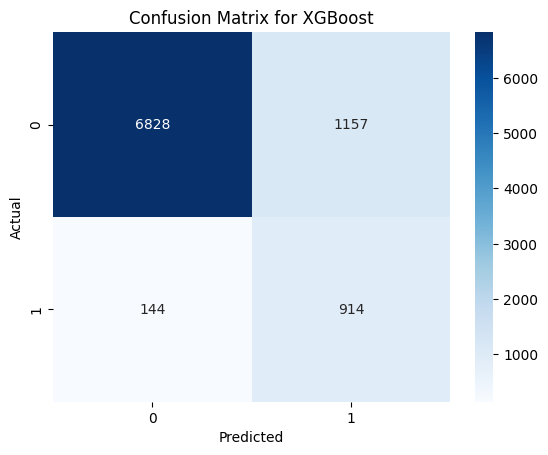

True Negative Rate(0) (Specificity) for XGBoost: 85.00%
True Positive Rate(1) (Sensitivity) for XGBoost: 86.00%


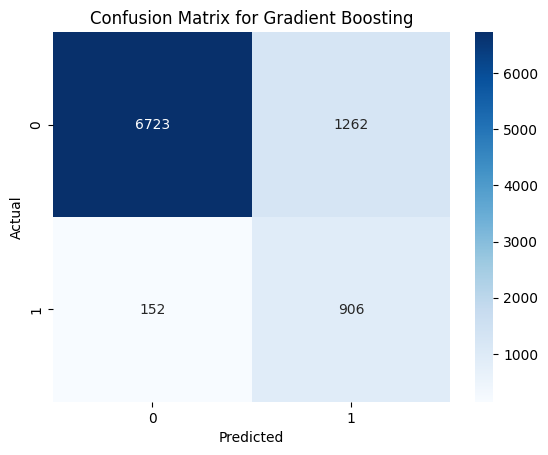

True Negative Rate(0) (Specificity) for Gradient Boosting: 84.00%
True Positive Rate(1) (Sensitivity) for Gradient Boosting: 85.00%


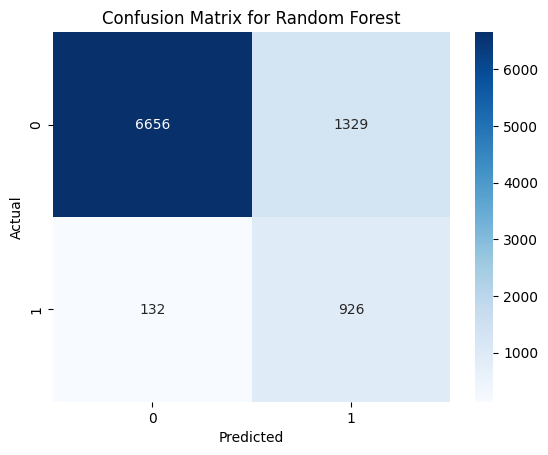

True Negative Rate(0) (Specificity) for Random Forest: 83.00%
True Positive Rate(1) (Sensitivity) for Random Forest: 87.00%


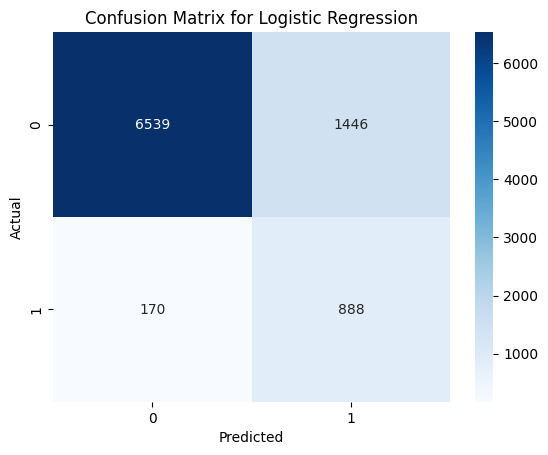

True Negative Rate(0) (Specificity) for Logistic Regression: 81.00%
True Positive Rate(1) (Sensitivity) for Logistic Regression: 83.00%


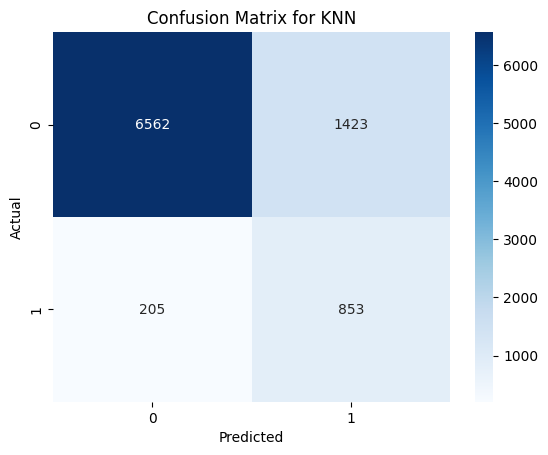

True Negative Rate(0) (Specificity) for KNN: 82.00%
True Positive Rate(1) (Sensitivity) for KNN: 80.00%


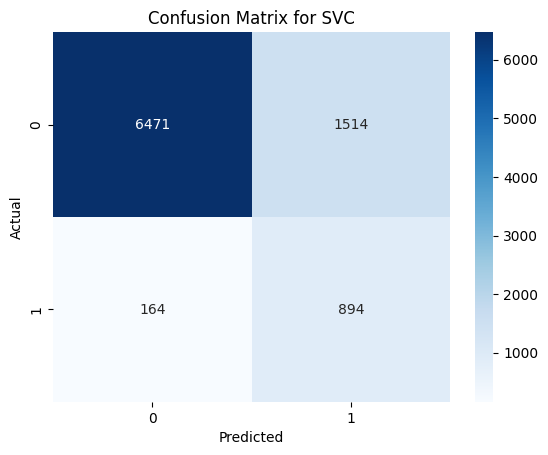

True Negative Rate(0) (Specificity) for SVC: 81.00%
True Positive Rate(1) (Sensitivity) for SVC: 84.00%


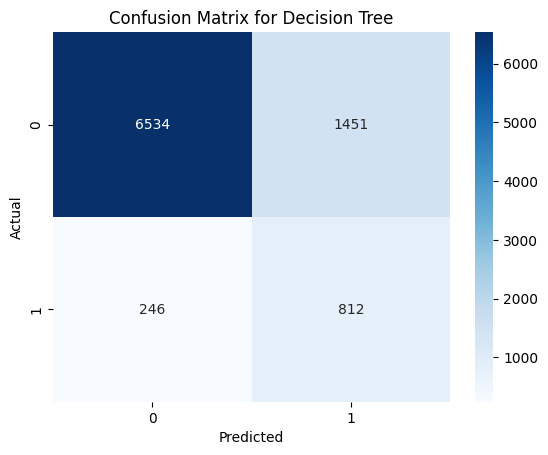

True Negative Rate(0) (Specificity) for Decision Tree: 81.00%
True Positive Rate(1) (Sensitivity) for Decision Tree: 76.00%


In [41]:
# Get the top 3 model names based on F1 Score
top_balanced1 = balanced_table1['Models'].tolist()

for mod in top_balanced1:
    model_pipeline1 = balanced_pipeline1[mod]  # Get the pipeline for the current model

    # Predictions using the model
    y_pred1 = model_pipeline1.predict(X_eval)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_eval_encoded, y_pred1)

    # Plotting the confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {mod}')
    plt.show()

    # Calculate metrics from the confusion matrix
    TN, FP, FN, TP = cm.ravel()
    true_negative_rate = int((TN / (TN + FP))*100)  # Specificity
    true_positive_rate = int((TP / (TP + FN))*100)  # Sensitivity/Recall

    # Print metrics
    print(f"True Negative Rate(0) (Specificity) for {mod}: {true_negative_rate:.2f}%")
    print(f"True Positive Rate(1) (Sensitivity) for {mod}: {true_positive_rate:.2f}%")

    # Calculate the classification report
    report = classification_report(y_eval_encoded, y_pred1)
    # print(f"Classification Report for {mod}:\n{report}")

__Observation__
- SVC and RandomForest performed the best under the undersampling technique, with a TPR/TNR of 88%/82% and 87%/85%, respectively.

__Summary__
- The SVC and RandomForest under the randomunsampler performed the overall best.


___

#### Visualise ROC Curve

ROC Curve for balanced Undersampled data

C:\Users\Pc\AppData\Local\Temp\ipykernel_21324\3137453941.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot([0, 1], [0, 1], 'k--', color='navy')


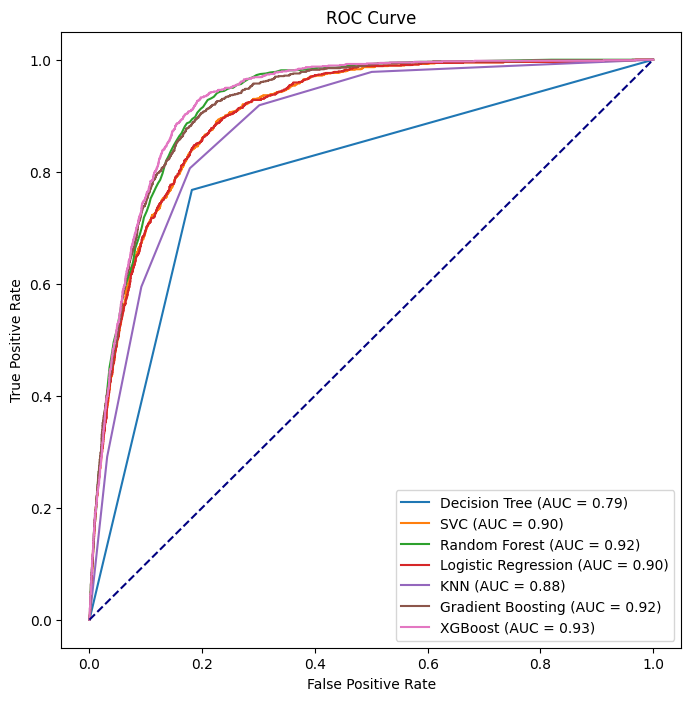

In [82]:
roc_curve_data={}

fig, ax = plt.subplots(figsize=(8,8))

for model_name, pipeline in balanced_pipeline1.items():
    y_score = pipeline.predict_proba(X_eval)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_eval_encoded, y_score)
    roc_auc = auc(fpr, tpr)
    
    roc_curve_df = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Threshold': thresholds,
    })
    roc_curve_data[model_name] = roc_curve_df
    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
ax.plot([0, 1], [0, 1], 'k--', color='navy')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
plt.show()


Observations:
- **XGBoost** has the highest AUC of 0.93, followed by **SVC** and **Random Forest** with an AUC of 0.92.
- **Logistic Regression** has a good AUC of 0.90, while **KNN** and **Decision Tree** have lower AUCs of 0.88 and 0.79, respectively.

__Conclusion:__
- **XGBoost**, **SVC**, and **Random Forest** has the highest AUC, with **XGBoost** leading.


#### Feature Selection

In [ ]:
# # Display the Amount column for further information
# pd.set_option('display.max_rows', None)

##### For SVC Model

                           Feature  Importance
42         cat_pipeline__month_mar    1.542082
3           num_pipeline__duration    1.358261
6           num_pipeline__previous    1.296250
45         cat_pipeline__month_oct    1.201177
49  cat_pipeline__poutcome_success    1.137629


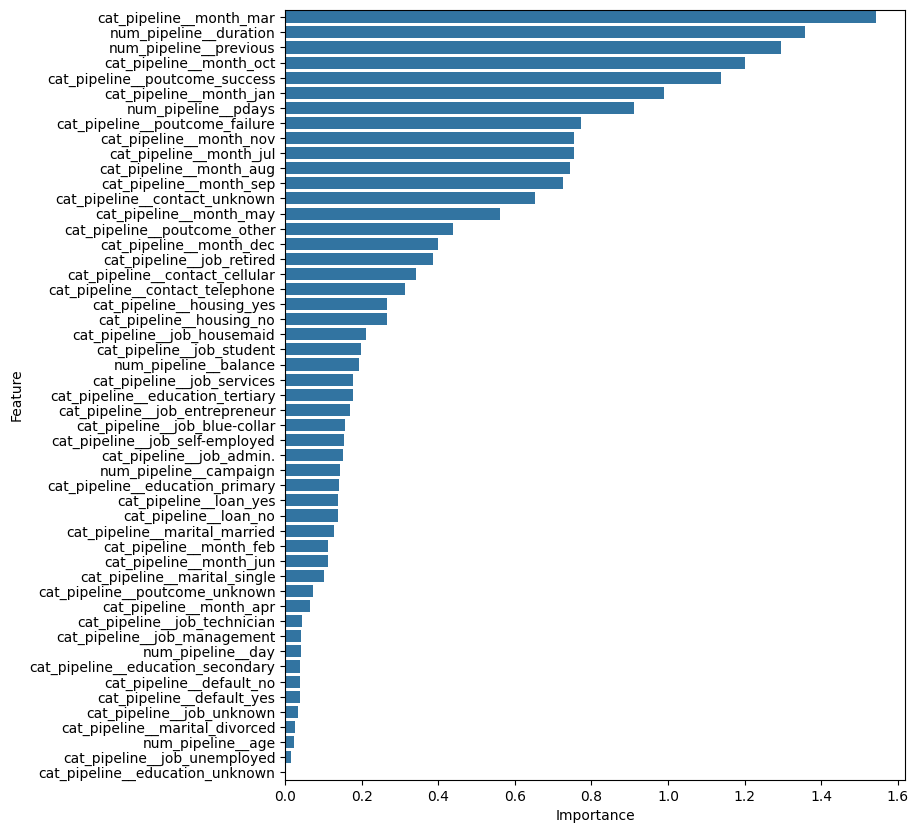

In [53]:
svc_model = balanced_pipeline1['SVC']

# Check data columns after pass through pipeline 
feature_columns = svc_model.named_steps['preprocessor'].get_feature_names_out()
# feature_columns = np.array([col.split('_')[-1]for col in feature_columns])

# Check importance of features in order (for select features)
svc_importances = abs(svc_model.named_steps['classifier'].coef_[0]) # For logistic regression we use coef_ instead of feature_importances_
svc_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': svc_importances
})
svc_importance_df.sort_values(by='Importance', ascending=False, inplace= True)
print(svc_importance_df.head())

# Show graphically
plt.figure(figsize=(8, 10))
sns.barplot(x='Importance', y='Feature', data= svc_importance_df)
plt.show()

##### For Random Forest

                  Feature  Importance
3  num_pipeline__duration    0.333996
1   num_pipeline__balance    0.075118
0       num_pipeline__age    0.069308
2       num_pipeline__day    0.061246
5     num_pipeline__pdays    0.032619


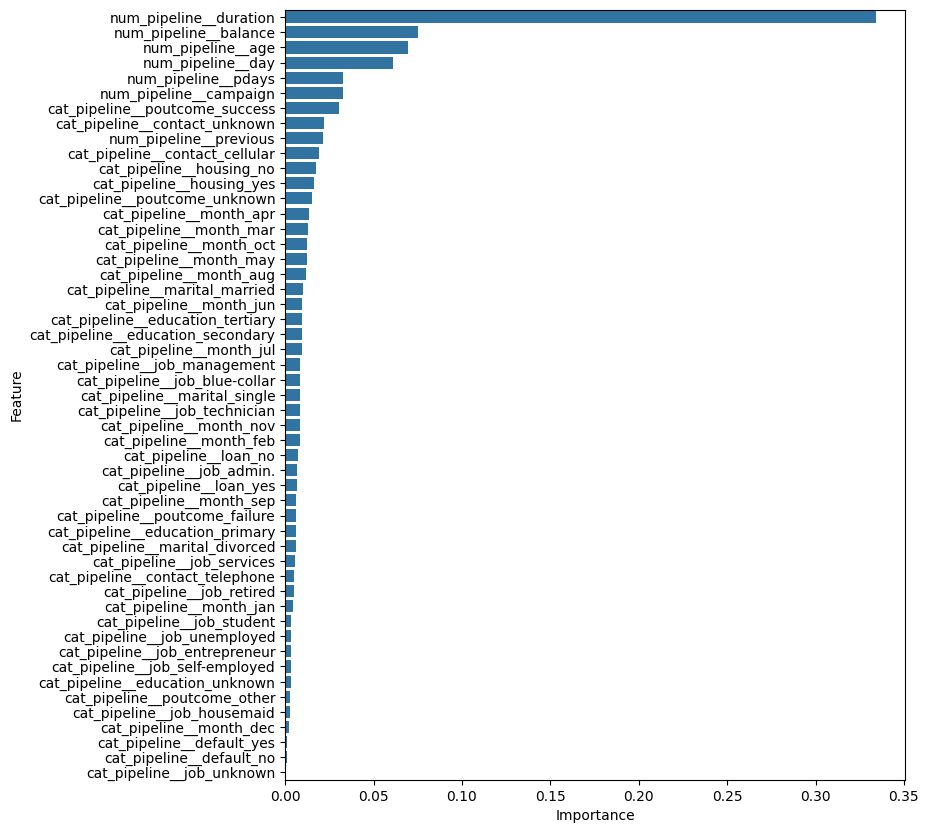

In [54]:
rf_model = balanced_pipeline1['Random Forest']

# Check data columns after pass through pipeline 
feature_columns = rf_model.named_steps['preprocessor'].get_feature_names_out()

# Check importance of features in order (for RandomForest)
rf_importances = rf_model.named_steps['classifier'].feature_importances_

# Create a DataFrame to hold feature names and their corresponding importance scores
rf_importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_importances
})

# Sort the features by importance in descending order
rf_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the top features
print(rf_importance_df.head())


# Show graphically
plt.figure(figsize=(8, 10))
sns.barplot(x='Importance', y='Feature', data= rf_importance_df)
plt.show()

##### __Conclusion__
- Keeping all features tends to give us the best performance from the model

#### Hyperparameter Tuning

##### _SVC Model_

In [ ]:
# Set the model
svc_model = balanced_pipeline1['SVC']

# Set the ranges for tuning the SVC model parameters
param_grid = [
    {
        'classifier__C': np.logspace(-4, 4, 10),  # Regularization parameter
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
        'classifier__gamma': ['scale', 'auto'],  # Kernel coefficient
        'classifier__degree': [2, 3, 4],  # Degree for 'poly' kernel
        'classifier__max_iter': [100, 1000, 2500, 5000]  # Maximum iterations
    }
]

# Assuming svc_model is a pipeline with the last step named 'classifier'
grid_search = GridSearchCV(
    svc_model,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1  # Use all processors
)

grid_search.fit(X_train, y_train_encoded)

# Show the best parameters
best_model_parameters = grid_search.best_params_
best_model_parameters

In [ ]:
# Calculate for the new predicted y
y_pred1 = best_model_parameters.predict(X_eval)

# Calculate for the new metrics
new_balanced_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
bm_metrics = classification_report(y_eval_encoded, y_pred1, output_dict=True)

accuracy = bm_metrics['accuracy']
precision = bm_metrics['weighted avg']['precision']
recall = bm_metrics['weighted avg']['recall']
f1 = bm_metrics['weighted avg']['f1-score']

# Get the model name
model_name = best_model_parameters.named_steps['classifier'].__class__.__name__

# Fit metrics into the bm_unbalanced_table
new_balanced_table.loc[len(new_balanced_table)] = [model_name, accuracy, precision, recall, f1]
new_balanced_table

__Key Insights__
- There is no significant change in the f1_score with and without fitting its best parameters.

##### _Random Forest Model_

In [ ]:
# Set the model
rf_model = balanced_pipeline1['Random Forest']

# Set the ranges for tuning the RandomForest model parameters
param_grid = [
    {
        'classifier__n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
        'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
        'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
        'classifier__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for splitting a node
        'classifier__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
    }
]

# Assuming rf_model is a pipeline with the last step named 'classifier'
grid_search = GridSearchCV(
    rf_model,
    param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1  # Use all processors
)

grid_search.fit(X_train, y_train_encoded)

# Show the best parameters
best_model_parameters = grid_search.best_params_
best_model_parameters



In [ ]:
# Calculate for the new predicted y
y_pred1 = best_model_parameters.predict(X_eval)

# Calculate for the new metrics
new_balanced_table = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])
bm_metrics = classification_report(y_eval_encoded, y_pred1, output_dict=True)

accuracy = bm_metrics['accuracy']
precision = bm_metrics['weighted avg']['precision']
recall = bm_metrics['weighted avg']['recall']
f1 = bm_metrics['weighted avg']['f1-score']

# Get the model name
model_name = best_model_parameters.named_steps['classifier'].__class__.__name__

# Fit metrics into the bm_unbalanced_table
new_balanced_table.loc[len(new_balanced_table)] = [model_name, accuracy, precision, recall, f1]
new_balanced_table

__Key Insights__
- There is no significant change in the f1_score with and without fitting its best parameters.

#### Threshold selection

##### _SVC_

In [89]:
roc_curve_svc= roc_curve_data['SVC'].sort_values("True Positive Rate", ascending=False)

# Calculate Youden's J statistic (TPR - FPR)
roc_curve_svc["Youden's J"] = roc_curve_svc['True Positive Rate'] - roc_curve_svc['False Positive Rate']

# Find the row with the maximum J statistic
best_threshold_row = roc_curve_svc.loc[roc_curve_svc["Youden's J"].idxmax()]

# Get the best threshold
best_threshold = best_threshold_row['Threshold']

# Print the roc_curve_data & best threshold
print(f'Best Threshold Row: \n{best_threshold_row}')



Best Threshold Row: 
False Positive Rate    0.228428
True Positive Rate     0.893195
Threshold              0.408725
Youden's J             0.664766
Name: 1049, dtype: float64


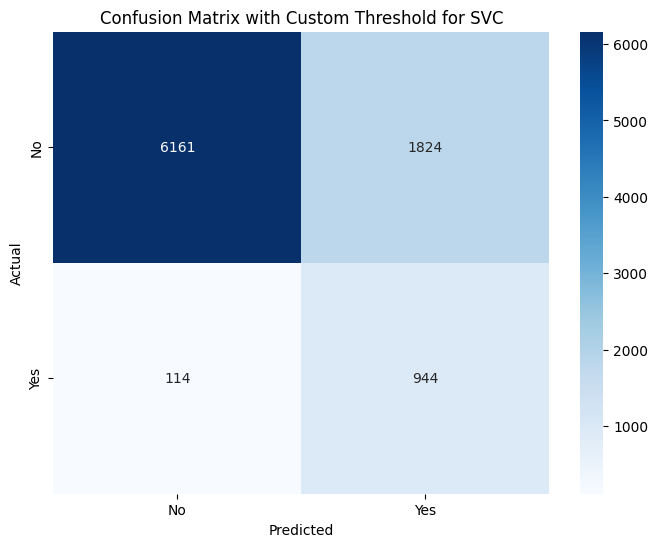

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7985
           1       0.34      0.89      0.49      1058

    accuracy                           0.79      9043
   macro avg       0.66      0.83      0.68      9043
weighted avg       0.91      0.79      0.82      9043



In [94]:
# Choose Model
svc_model= balanced_pipeline1["SVC"]

# Get the predicted probabilities for the positive class
y_pred_prob_svc = svc_model.predict_proba(X_eval)[:, 1]

# Apply the optimal threshold (use the best threshold found earlier)
y_pred_svc = (y_pred_prob_svc >= 0.408725).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_eval_encoded, y_pred_svc)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix with Custom Threshold for SVC')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for additional evaluation metrics
print(classification_report(y_eval_encoded, y_pred_svc))


Summary
- The SVC model's True Positive Rate improved from 84% to 89%, resulting in better predictions for client term deposit subscriptions.

##### _Random Forest_

In [ ]:
roc_curve_rf= roc_curve_data['Random Forest'].sort_values("True Positive Rate", ascending=False)

# Calculate Youden's J statistic (TPR - FPR)
roc_curve_rf["Youden's J"] = roc_curve_rf['True Positive Rate'] - roc_curve_rf['False Positive Rate']

# Find the row with the maximum J statistic
best_threshold_row_rf = roc_curve_rf.loc[roc_curve_rf["Youden's J"].idxmax()]

# Get the best threshold
best_threshold_rf = best_threshold_row_rf['Threshold']

# Print the roc_curve_data & best threshold
print(f'Best Threshold Row: \n{best_threshold_row_rf}')

Best Threshold Row: 
False Positive Rate    0.209768
True Positive Rate     0.928166
Threshold              0.410000
Youden's J             0.718398
Name: 59, dtype: float64


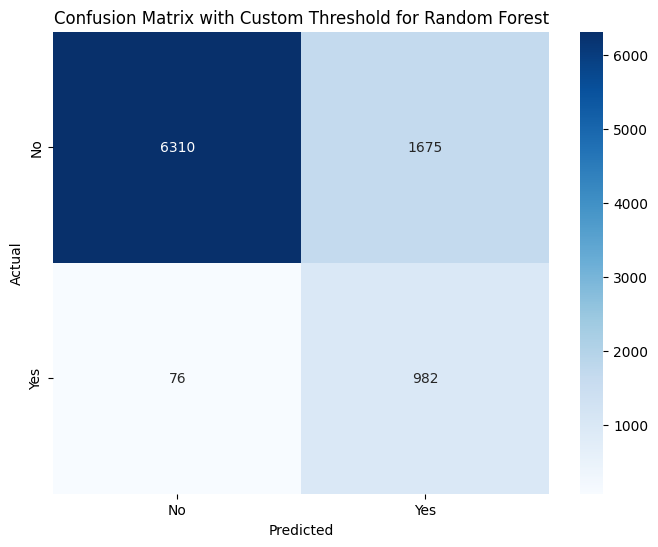

              precision    recall  f1-score   support

           0       0.99      0.79      0.88      7985
           1       0.37      0.93      0.53      1058

    accuracy                           0.81      9043
   macro avg       0.68      0.86      0.70      9043
weighted avg       0.92      0.81      0.84      9043



In [93]:
# Get the predicted probabilities for the positive class
y_pred_prob_rf = rf_model.predict_proba(X_eval)[:, 1]

# Apply the optimal threshold (use the best threshold found earlier)
y_pred_rf = (y_pred_prob_rf >= best_threshold_rf).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_eval_encoded, y_pred_rf)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix with Custom Threshold for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report for additional evaluation metrics
print(classification_report(y_eval_encoded, y_pred_rf))


Summary
- The Random Forest model's True Positive Rate improved from 87% to 93%, resulting in better predictions for client term deposit subscriptions.

#### Export model and encoder with joblib

In [ ]:
import joblib

# Export models  
rf_model_export = balanced_pipeline1['Random Forest']
joblib.dump(rf_model_export, "random_forest_model.pk1")

svc_model_export = balanced_pipeline1['SVC']
joblib.dump(svc_model_export, "svc_model.pkl")



# Threshold values
threshold1 = 0.408725
joblib.dump(threshold1, 'rf_threshold.pkl')

# Save the threshold value
threshold2 = 0.410000
joblib.dump(threshold2, 'svc_threshold.pkl')

In [ ]:
# Save encoder1 (Label Encoder)
joblib.dump(encoder1, 'encoder.joblib')


## Step 5: Conclusion


### 5.1 Summary of Key Insights and Recommendations
1. Most of the churned customers had tenures within 1 - 29 months, and customers who passed the 29-month mark generally churned less.
Customers generally churned more when they crossed USD 56.15 monthly charge mark, with majority falling between USD 56.15 (lower quartile) and USD 79.65 (median monthly charge of churned customers)

2. Churn levels spiked most when monthly charges were USD 64.45

3. Most of the customers who churned fell within USD 134.46 and USD 2,332.30. This is surprising and may be investigated further as it gives an indication that total charges may not be the sole reason for churn

4. Males are almost just as likely to churn as females. Hence, gender - like total charges - may not be a sole determinant for assessing the likelihood of churn

5. Fibre-optic service users were over twice as likely to churn as compared to DSL users.

6. The churn proportion for electronic checks (45.29%) is concerning, and should be investigated and improved to ensure convenience and ease of use for customers.

#### 5.2 Conclusion
Per their confusion matrices and F2 scores, the Logistic regression model (0.80 F1-score) generalizes and performs better on unseen data than the other models). The Logistic regression is therefore recommended for further optimization and deployment. 